<a href="https://colab.research.google.com/github/MH-1294/ML_DL/blob/main/Feed_Forward_Algorithm_(FFNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading and preparing the data

In [ ]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.3, random_state=42
)

In [ ]:
print("Length of x_train:", len(x_train))
print("Length of x_val:", len(x_val))
print("Length of x_test:", len(x_test))

Length of x_train: 42000
Length of x_val: 18000
Length of x_test: 10000


In [ ]:
#shape of training and testing dataset
x_train.shape, x_val.shape, x_test.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

((28, 28),)

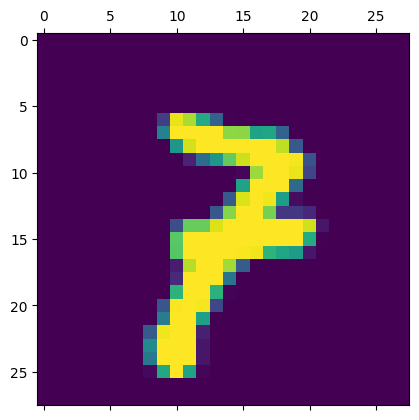

In [ ]:

plt.matshow(x_train[0]), #to see how first image look
x_train[0].shape,

In [ ]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Creating the model


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [ ]:
history=model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4646 - loss: 1.5635 - val_accuracy: 0.8829 - val_loss: 0.4254
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8233 - loss: 0.5870 - val_accuracy: 0.9152 - val_loss: 0.2978
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8734 - loss: 0.4346 - val_accuracy: 0.9291 - val_loss: 0.2443
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8959 - loss: 0.3710 - val_accuracy: 0.9384 - val_loss: 0.2099
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9149 - loss: 0.3059 - val_accuracy: 0.9446 - val_loss: 0.1897
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9241 - loss: 0.2682 - val_accuracy: 0.9479 - val_loss: 0.1756
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9324 - loss: 0.2410 - val_accuracy: 0.9538 - val_loss: 0.1587
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9385 - loss: 0.218

# Evaluate the model

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
# Predict the labels for test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9564 - loss: 0.1425
Loss=0.119
Accuracy=0.963
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[ 970    0    1    1    0    4    2    1    1    0]
 [   0 1122    3    3    0    1    4    0    2    0]
 [   9    2  986    6    4    1    2    8   14    0]
 [   1    0    7  974    0    6    0    8   11    3]
 [   2    0    2    0  949    1    5    1    2   20]
 [   6    0    0   18    2  844    9    2    7    4]
 [   8    3    0    0   10   11  921    0    5    0]
 [   1    7   18    2    1    0    0  977    2   20]
 [   4    2    2   10    4    5    6    5  933    3]
 [   4    6    0    8   16    4    1    9    5  956]]


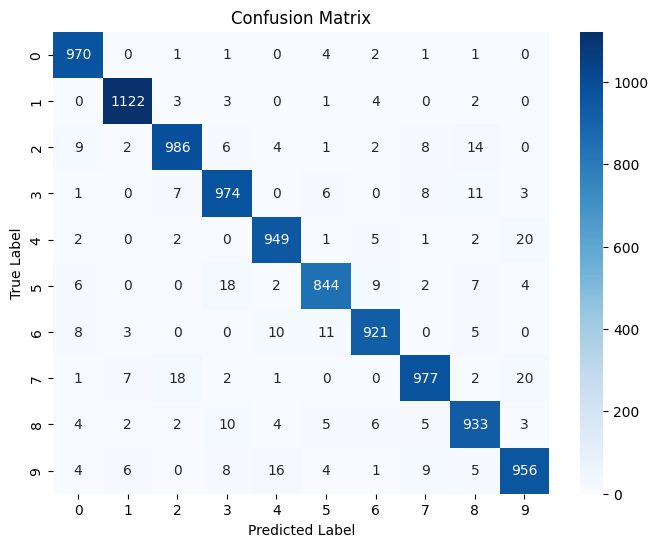

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes, digits=3))

Classification Report:

              precision    recall  f1-score   support

           0      0.965     0.990     0.977       980
           1      0.982     0.989     0.986      1135
           2      0.968     0.955     0.961      1032
           3      0.953     0.964     0.959      1010
           4      0.962     0.966     0.964       982
           5      0.962     0.946     0.954       892
           6      0.969     0.961     0.965       958
           7      0.966     0.950     0.958      1028
           8      0.950     0.958     0.954       974
           9      0.950     0.947     0.949      1009

    accuracy                          0.963     10000
   macro avg      0.963     0.963     0.963     10000
weighted avg      0.963     0.963     0.963     10000



# Plot graph for Accuracy and Loss

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

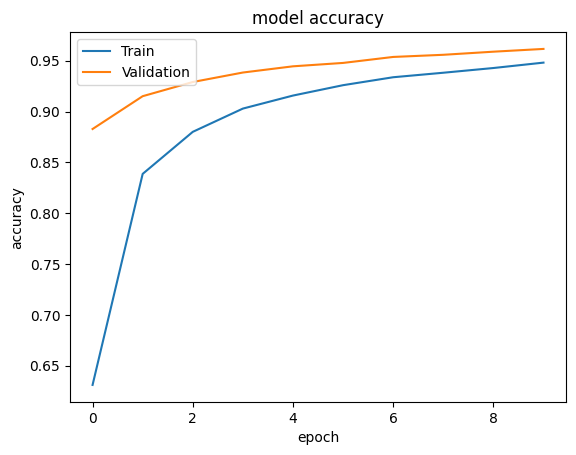

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

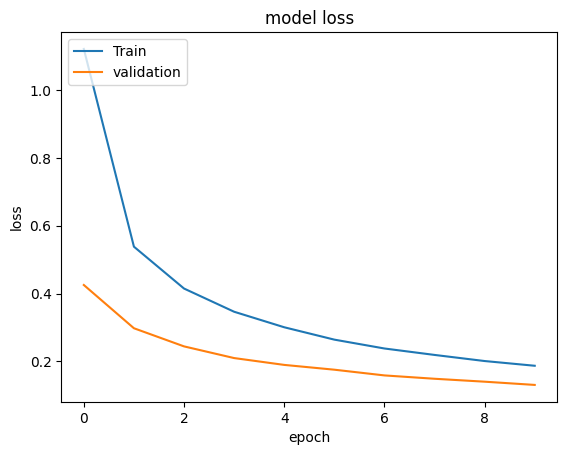

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('Mehedi Abid.keras')